In [64]:
import matplotlib.pyplot as plt

from Bio import Seq
from Bio import SeqIO
from Bio.SeqUtils import GC

## Task 1

**1. Class that describes students in Bioinformatic Institute:**
- methods `subject_semester1` and `subject_semester2` will show which subjects student will learn during the 1 and 2 semester subsequently
- method `learning` will add a new skill to student
- method `meeting` will show if two students can meet offline
- method `skills_show` will show what student can do

In [161]:
class BioinformaticsStudent:
    def __init__(self, name, course, city, skills=None):
        self.skills = skills
        if self.skills is None:
            self.skills = set()
        self.name = name
        self.course = course
        self.city = city
    def subjects_semester1(self):
        bio_subjects = ['Discrete math,',
                        'Statistics and R,',
                        'Python programming,',
                        'Command line,',
                        'Bioinformatics practice']
        programmer_subjects = ['Algorithms,',
                               'Statistics,',
                               'Molecular biology,',
                               'Bioinformatics practice']

        if self.course == 'Bioinformatics for biologists':
            print(*bio_subjects)
        elif self.course == 'Algorithmic bioinformatics':
            print(*programmer_subjects)
    def subjects_semester2(self):
        bio_subjects = ['Introduction to ML,',
                        'Python programming,',
                        'Jornal club,',
                        'Molecular phylogenetics and evolution,',
                        'Bioinformatics practice,',
                        'Project']
        programmer_subjects = ['ML,',
                               'Statistics,',
                               'Jornal club,',
                               'Molecular phylogenetics and evolution,',
                               'Bioinformatics practice,',
                               'Project']
        if self.course == 'Bioinformatics for biologists':
            print(*bio_subjects)
        elif self.course == 'Algorithmic bioinformatics':
            print(*programmer_subjects)
    def learning(self, new_skill):
        self.skills.add(new_skill)
    def meeting(self, student):
        if self.city == student.city:
            print(f'{self.name} and {student.name} can meet offline in {self.city}!')
        else:
            print(f'{self.name} and {student.name} can meet only online')
    def skills_show(self):
        print(f'{self.name} can', *self.skills)

**2. Tests for task 1**

In [162]:
# any similarity to real people, places, or events are coincidental
student1 = BioinformaticsStudent('Vasya', course= 'Bioinformatics for biologists', city='Moscow')
student2 = BioinformaticsStudent('Masha', course= 'Algorithmic bioinformatics', city='Moscow')
student3 = BioinformaticsStudent('Dasha', course= 'Bioinformatics for biologists', city='Saint-Petersburg')

student1.subjects_semester1()
student2.subjects_semester2()

student3.learning('write classes in Python')

student1.meeting(student2)
student2.meeting(student3)

student3.skills_show()

Discrete math, Statistics and R, Python programming, Command line, Bioinformatics practice
ML, Statistics, Jornal club, Molecular phylogenetics and evolution, Bioinformatics practice, Project
Vasya and Masha can meet offline in Moscow!
Masha and Dasha can meet only online
Dasha can write classes in Python


## Task 2 - working with RNA

**1. Creating class for working with RNA**
- Consrtuctor takes RNA sequence and creates object with it
- Method `translation` returns string with protein (only one reading frame)
- Method  `reversed` returns sequence with cDNA

In [178]:
class Rna:
    def __init__(self, sequence):
        self.sequence = Seq.Seq(sequence)
    def translation(self):
        translated_sequence = self.sequence.translate()
        return translated_sequence
    def reverse_transcription (self):
        dna = self.sequence.back_transcribe()
        return dna

**2. Test for task 2**

In [180]:
rna_test = Rna('AUCGUCUGUA')
translated_rna = rna_test.translation()
print('protein:', translated_rna)
cdna = rna_test.reverse_transcription()
print('cDNA:', cdna)

protein: IVC
cDNA: ATCGTCTGTA


## Task 3 - positive sets

**1. Creating descendant class from *sets* that adds only positive numbers**
Method `add` can add only positive numbers, otherwise an error will occur

In [181]:
class PositiveSet(set):
    def __init__(self, *args):
        if len(args) == 0:
            super().__init__(*args)
        else:
            for i in args:
                if i > 0:
                    super(PositiveSet, self).add(i)
    def add (self, *args):
        for number in args:
            if number > 0:
                super(PositiveSet, self).add(number)

**2. Test for task 3**

In [182]:
test_set = PositiveSet()
test_set1 = PositiveSet(1, 4, 5)
test_set2 = PositiveSet(1, -4, 5)
# test for positive number
print('test 1:', *test_set) # empty
print('test 2:', *test_set1) # 1 4 5
print('test 3:', *test_set2) # 1 5
test_set.add(3)
print('positive number added to test 1:', *test_set) # 3
# test for negative number
test_set.add(-5)
print('positive number added to test 1:', *test_set) # 3

test 1:
test 2: 1 4 5
test 3: 1 5
positive number added to test 1: 3
positive number added to test 1: 3


## Task  4 - Fasta

**1. Creating class to work with fasta sequences**
takes path to fasta file
- `seq_amount` - count the amount of sequences in the file
- `length_hist` - makes a plot with lengths of sequences
- `gc_count` - counts a GC-content for all the sequences
- `four_mers` - makes a histogram of possible 4-mers
- `metrics` - implementation of all the metrics
- when using `print` for object of the class output is the path to fasta file

In [187]:
class Fasta:
    def __str__(self):
        return self.path
    __repr__ = __str__
    def __init__(self, path):
        self.path = path
        self.sequences = [sequence.seq for sequence in SeqIO.parse(path,'fasta')]
    def seq_amount(self):
        return len(self.sequences)
    def length_hist(self):
        lengths = [len(sequence) for sequence in self.sequences]
        fig, axis = plt.subplots(figsize=(15, 7))
        axis.hist(lengths)
        plt.xlabel("Sequence length")
        plt.ylabel("Sequences count")
        plt.show()
    def gc_count(self):
        gc_count = [GC(sequence) for sequence in self.sequences]
        return gc_count
    def four_mers(self):
        four_mer = {}
        for sequence in self.sequences:
            for i in range(4):
                for j in range(i, len(sequence), 4):
                    mer = sequence[i+j:i+j+4]
                    if len(mer) == 4:
                        if mer in four_mer.keys():
                            four_mer[mer] += 1
                        else:
                            four_mer[mer] = 1
        four_mers_sum = sum(four_mer.values())
        four_mer = dict(sorted(four_mer.items(), key=lambda x: x[0]))
        for key, value in four_mer.items():
            four_mer[key] = value/four_mers_sum
        fig, axis = plt.subplots(figsize=(15, 7))
        axis.bar(x=list(range(len(four_mer))), height=four_mer.values())
        axis.set_xticks(range(0, len(four_mer), 1))
        axis.set_xticklabels(four_mer.keys(), rotation = 90)
        plt.xlabel("4-mer")
        plt.ylabel("4-mer count")
        plt.show()
    def metrics(self):
        return self.seq_amount(), self.gc_count()

**2. Test for task 4**

amount of sequences: 3


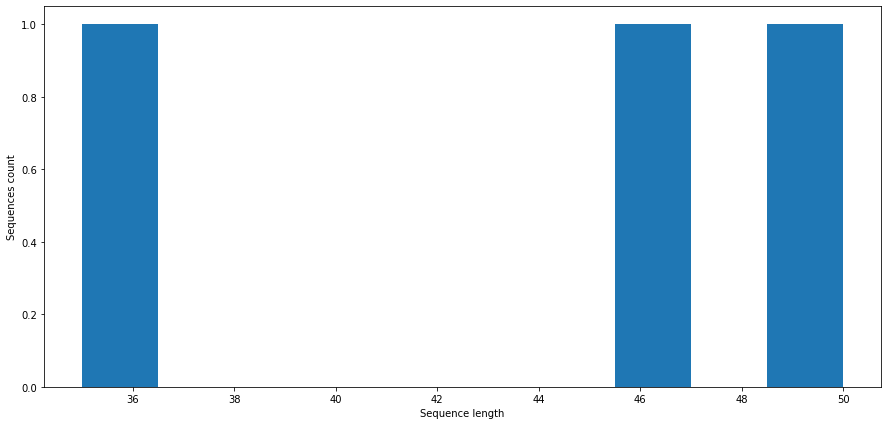

gc_count: [48.57142857142857, 42.0, 28.26086956521739]


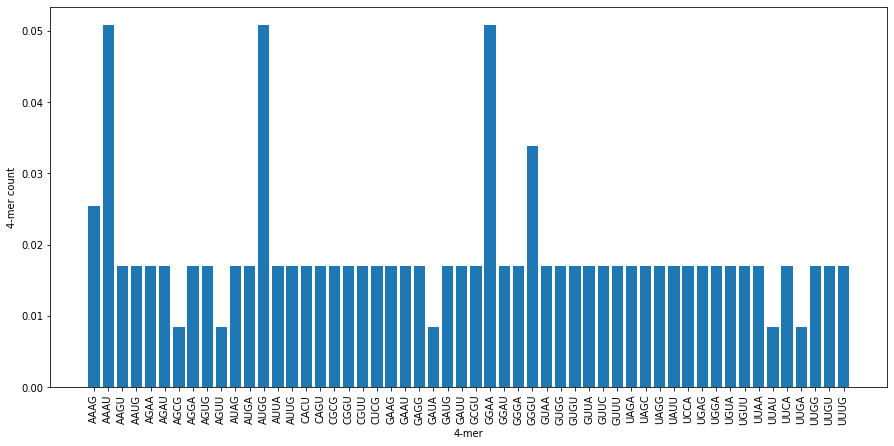

example.fasta
[example.fasta]
3 [48.57142857142857, 42.0, 28.26086956521739]


In [189]:
seq = Fasta('example.fasta')
print('amount of sequences:', seq.seq_amount())
seq.length_hist()
print('gc_count:', seq.gc_count())
seq.four_mers()
print(seq)
print([seq])
print(*seq.metrics())